##Imports and Conection with GDrive

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

In [6]:
import os
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/MyDrive/')
# enter the path of the folder where the out file is located
path = "/content/drive/MyDrive/Artigos_IC"
os.chdir(path)
import shutil
shutil.copy('/content/drive/MyDrive/Artigos_IC/out.csv', '/content/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/out.csv'

##Read Dataset csv as dataframe

In [7]:
# Uploading the CSV file
df = pd.read_csv('/content/out.csv')

/tmp/ipython-input-838641279.py:2: DtypeWarning: Columns (7,71,72,73,74,75,156) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/out.csv')


##Standardize column and fields names

In [8]:
df.columns

Index(['system_id', 'commit_hash', 'start_line', 'end_line', 'smell', 'id',
       'reviewer_id', 'sample_id', 'severity', 'longmethod_label',
       ...
       'smell_organic_blob', 'smell_pmd_longmethod', 'smell_pmd_featureenvy',
       'smell_pmd_dataclass', 'smell_pmd_blob', 'smell_designite_longmethod',
       'smell_designite_featureenvy', 'smell_designite_dataclass',
       'smell_designite_blob', 'agreement_experts_has_smell_name'],
      dtype='object', length=193)

##Create new columns with the agreement between the manual and automatic labeling

In [9]:
#Agreement
list_system = ['smell_organic', 'smell_pmd', 'smell_designite']

for s in list_system:

  globals()[f'{s}_longmethod'] = []
  globals()[f'{s}_featureenvy'] = []
  globals()[f'{s}_dataclass'] = []
  globals()[f'{s}_blob'] = []

  for i in df.index:
    if (type(df[s][i]) != float) :
      if (((df[s][i]) == ('longmethod')) or ('longmethod' in (df[s][i]))) and (df['longmethod_label'][i] == 1) :
        globals()[f'{s}_longmethod'].append(1)
      else :
        globals()[f'{s}_longmethod'].append(0)
      if (((df[s][i]) == ('featureenvy'))  or 'featureenvy' in (df[s][i])) and (df['featureenvy_label'][i] == 1) :
        globals()[f'{s}_featureenvy'].append(1)
      else :
        globals()[f'{s}_featureenvy'].append(0)
      if (((df[s][i]) == ('dataclass')) or 'dataclass' in (df[s][i])) and (df['dataclass_label'][i] == 1) :
        globals()[f'{s}_dataclass'].append(1)
      else :
        globals()[f'{s}_dataclass'].append(0)
      if (((df[s][i]) == ('blob')) or 'blob' in (df[s][i])) and (df['blob_label'][i] == 1) :
        globals()[f'{s}_blob'].append(1)
      else :
        globals()[f'{s}_blob'].append(0)
    else :
      globals()[f'{s}_longmethod'].append(0)
      globals()[f'{s}_featureenvy'].append(0)
      globals()[f'{s}_dataclass'].append(0)
      globals()[f'{s}_blob'].append(0)

df['smell_organic_longmethod'] = smell_organic_longmethod
df['smell_organic_featureenvy'] = smell_organic_featureenvy
df['smell_organic_dataclass'] = smell_organic_dataclass
df['smell_organic_blob'] = smell_organic_blob

df['smell_pmd_longmethod'] = smell_pmd_longmethod
df['smell_pmd_featureenvy'] = smell_pmd_featureenvy
df['smell_pmd_dataclass'] = smell_pmd_dataclass
df['smell_pmd_blob'] = smell_pmd_blob

df['smell_designite_longmethod'] = smell_designite_longmethod
df['smell_designite_featureenvy'] = smell_designite_featureenvy
df['smell_designite_dataclass'] = smell_designite_dataclass
df['smell_designite_blob'] = smell_designite_blob
df.to_csv('/content/out_smell_2.csv', index=False)

In [10]:
df_3 = pd.read_csv('/content/out.csv')
print(df_3['agreement_has_smell'])
for index, row in df.iterrows():
    smell = row['smell_designite_featureenvy']
    if(smell==1):
      print(smell,row['smell'])

/tmp/ipython-input-1020802759.py:1: DtypeWarning: Columns (7,71,72,73,74,75,156) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv('/content/out.csv')


0        0
1        0
2        0
3        0
4        0
        ..
17828    0
17829    0
17830    0
17831    0
17832    0
Name: agreement_has_smell, Length: 17833, dtype: int64


##Map the list in column A to the list in column C adding new rows in the dataframe

In [ ]:
df = df.rename(columns={'reviewer_id': 'A', 'severity': 'C'})
df_result = df.explode(list('AC'))
df_result.head(30)

df_result = df_result.rename(columns={'A':'reviewer_id', 'C':'severity'})

##Adicionar info in dataframe (new column) about background of the expert ('reviewer_id')

In [13]:
#Background dos experts from MLCQ/MLCQCodeSmellDevelopersSurvey

groups = {
    23: 'Middle', 6: 'Junior', 15: 'Junior', 25: 'Senior', 7: 'Junior',
    8: 'Junior', 9: 'Junior', 15: 'Junior', 5: 'Middle',
    3: 'Senior', 14: 'Senior', 10: 'Senior', 12: 'Senior', 4: 'Senior',
    20: 'Senior', 11: 'Middle', 17: 'Senior', 16: 'Middle', 22: 'Middle'
}

df['background'] = df['reviewer_id'].map(groups)
df['severity'] = df['severity'].replace('\'', '', regex=True)


In [15]:
df_graph = df[['background', 'longmethod_label', 'featureenvy_label', 'dataclass_label', 'blob_label',
  'smell_organic_longmethod', 'smell_organic_featureenvy', 'smell_organic_dataclass', 'smell_organic_blob',
  'smell_pmd_longmethod', 'smell_pmd_featureenvy', 'smell_pmd_dataclass', 'smell_pmd_blob',
  'smell_designite_longmethod', 'smell_designite_featureenvy', 'smell_designite_dataclass', 'smell_designite_blob']]
df_graph = df_graph.groupby(['background'], dropna=False).sum()
df_graph


,longmethod_label,featureenvy_label,dataclass_label,blob_label,smell_organic_longmethod,smell_organic_featureenvy,smell_organic_dataclass,smell_organic_blob,smell_pmd_longmethod,smell_pmd_featureenvy,smell_pmd_dataclass,smell_pmd_blob,smell_designite_longmethod,smell_designite_featureenvy,smell_designite_dataclass,smell_designite_blob
background,,,,,,,,,,,,,,,,
Junior,56,84,149,137,3,5,2,4,4,0,21,28,6,0,0,0
Middle,125,108,185,250,23,5,14,13,7,0,28,25,16,0,0,0
Senior,746,682,1173,1247,83,42,39,94,26,0,122,214,66,0,0,0
NaN,243,257,515,493,14,13,25,29,8,0,56,83,26,0,0,0


In [16]:
# Calculating Percentage
def ComputePercent(df_graph):
  tool = ['organic', 'pmd', 'designite']
  smell = ['longmethod', 'featureenvy', 'dataclass', 'blob']

  for i in tool:
    for j in smell:
      df_graph['smell_'+i+'_'+j+''] = round((df_graph['smell_'+i+'_'+j+''] * 100) / df_graph[''+j+'_label'])

ComputePercent(df_graph)
df_graph = df_graph[['smell_organic_longmethod', 'smell_organic_featureenvy', 'smell_organic_dataclass', 'smell_organic_blob',
  'smell_pmd_longmethod', 'smell_pmd_dataclass', 'smell_pmd_blob',
  'smell_designite_longmethod', 'smell_designite_featureenvy']]
df_graph = df_graph.T
df_graph.reset_index(inplace=True)
df_graph.head(5)

background,index,Junior,Middle,Senior,NaN
0,smell_organic_longmethod,5.0,18.0,11.0,6.0
1,smell_organic_featureenvy,6.0,5.0,6.0,5.0
2,smell_organic_dataclass,1.0,8.0,3.0,5.0
3,smell_organic_blob,3.0,5.0,8.0,6.0
4,smell_pmd_longmethod,7.0,6.0,3.0,3.0


## Background X Agreement Smells Types

Analyze codesmell detection from developers' background

While analyzing experts' backgrounds, a hypothesis is that the more experienced an expert is, the higher the agreement of the manual labeling with the automatic labeling.



Text(0.5, 1.0, 'Code smell per tool and background')

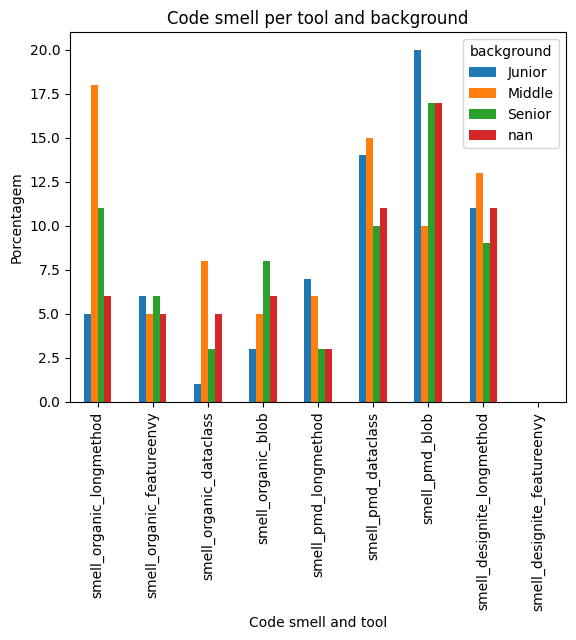

In [17]:
ax = df_graph.plot(x='index', kind='bar', stacked=False,
        title='Stacked Bar Graph by dataframe')
#ax = df_graph.plot(x='index', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')

ax.set_xlabel("Code smell and tool")
ax.set_ylabel("Porcentagem")
ax.set_title("Code smell per tool and background")


## Severity X Agreement Smells Types

In [19]:
df_severity = df[['severity', 'longmethod_label', 'featureenvy_label', 'dataclass_label', 'blob_label',
  'smell_organic_longmethod', 'smell_organic_featureenvy', 'smell_organic_dataclass', 'smell_organic_blob',
  'smell_pmd_longmethod', 'smell_pmd_featureenvy', 'smell_pmd_dataclass', 'smell_pmd_blob',
  'smell_designite_longmethod', 'smell_designite_featureenvy', 'smell_designite_dataclass', 'smell_designite_blob']]
#df_severity['severity'] = df_severity['severity'].replace('\'', '', regex=True)
df_severity = df_severity.groupby(['severity'], dropna=False).sum()
df_severity.head(30)

,longmethod_label,featureenvy_label,dataclass_label,blob_label,smell_organic_longmethod,smell_organic_featureenvy,smell_organic_dataclass,smell_organic_blob,smell_pmd_longmethod,smell_pmd_featureenvy,smell_pmd_dataclass,smell_pmd_blob,smell_designite_longmethod,smell_designite_featureenvy,smell_designite_dataclass,smell_designite_blob
severity,,,,,,,,,,,,,,,,
critical,93,28,188,178,9,3,14,20,25,0,51,83,13,0,0,0
major,329,154,477,399,66,8,26,39,18,0,89,103,48,0,0,0
minor,528,321,641,730,45,18,30,45,0,0,51,84,38,0,0,0
none,220,628,716,820,3,36,10,36,2,0,36,80,15,0,0,0


In [20]:
# Calculating Percentage
ComputePercent(df_severity)
df_severity = df_severity[['smell_organic_longmethod', 'smell_organic_featureenvy', 'smell_organic_dataclass', 'smell_organic_blob',
  'smell_pmd_longmethod', 'smell_pmd_featureenvy', 'smell_pmd_dataclass', 'smell_pmd_blob',
  'smell_designite_longmethod', 'smell_designite_featureenvy', 'smell_designite_dataclass', 'smell_designite_blob']]
df_severity = df_severity.T
df_severity.reset_index(inplace=True)
df_severity

severity,index,critical,major,minor,none
0,smell_organic_longmethod,10.0,20.0,9.0,1.0
1,smell_organic_featureenvy,11.0,5.0,6.0,6.0
2,smell_organic_dataclass,7.0,5.0,5.0,1.0
3,smell_organic_blob,11.0,10.0,6.0,4.0
4,smell_pmd_longmethod,27.0,5.0,0.0,1.0
5,smell_pmd_featureenvy,0.0,0.0,0.0,0.0
6,smell_pmd_dataclass,27.0,19.0,8.0,5.0
7,smell_pmd_blob,47.0,26.0,12.0,10.0
8,smell_designite_longmethod,14.0,15.0,7.0,7.0
9,smell_designite_featureenvy,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Code smell per tool and severity')

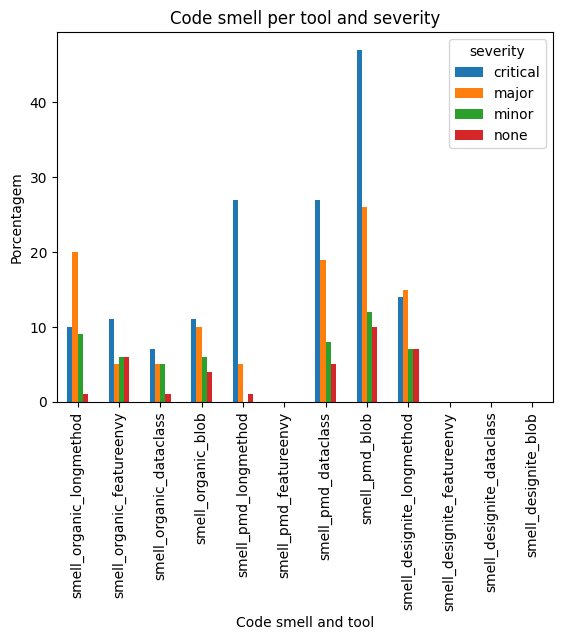

In [21]:
ax = df_severity.plot(x='index', kind='bar', stacked=False,
        title='Stacked Bar Graph by dataframe')
#ax = df_graph.plot(x='index', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')

ax.set_xlabel("Code smell and tool")
ax.set_ylabel("Porcentagem")
ax.set_title("Code smell per tool and severity")

##Tool vs agreement has smell


In [24]:
df_agglomeration = pd.DataFrame()

df_agglomeration['Aglomeration'] = ['MLCQ', 'smell_organic_aglomeration', 'smell_pmd_aglomeration', 'smell_designite_aglomeration']

df_hasSmell = df[['longmethod_label', #'featureenvy_label', 'dataclass_label', 'blob_label',
                         'smell_organic_aglomeration', 'smell_pmd_aglomeration', 'smell_designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["longmethod_label"] == 1)]
df_agglomeration['longmethod'] = df_hasSmell.sum().values

df_hasSmell = df[['featureenvy_label', #'dataclass_label', 'blob_label',
                         'smell_organic_aglomeration', 'smell_pmd_aglomeration', 'smell_designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["featureenvy_label"] == 1)]
df_agglomeration['featureenvy'] = df_hasSmell.sum().values

df_hasSmell = df[['dataclass_label', #'blob_label',
                         'smell_organic_aglomeration', 'smell_pmd_aglomeration', 'smell_designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["dataclass_label"] == 1)]
df_agglomeration['dataclass'] = df_hasSmell.sum().values

df_hasSmell = df[['blob_label',
                         'smell_organic_aglomeration', 'smell_pmd_aglomeration', 'smell_designite_aglomeration']]
df_hasSmell = df_hasSmell[(df_hasSmell["blob_label"] == 1)]
df_agglomeration['blob'] = df_hasSmell.sum().values

# set the 'Aglomeration' column as index
df_agglomeration.set_index('Aglomeration', inplace=True)
df_agglomeration = df_agglomeration.T
df_agglomeration




Aglomeration,MLCQ,smell_organic_aglomeration,smell_pmd_aglomeration,smell_designite_aglomeration
longmethod,1170,74,246,569
featureenvy,1131,53,127,506
dataclass,2022,50,606,1288
blob,2127,86,1003,1344


In [25]:
# Calculating Percentage
tool = ['organic', 'pmd', 'designite']
for i in tool:
  df_agglomeration['smell_'+i+'_aglomeration'] = round((df_agglomeration['smell_'+i+'_aglomeration'] * 100) / df_agglomeration['MLCQ'])

df_agglomeration = df_agglomeration[['smell_organic_aglomeration', 'smell_pmd_aglomeration', 'smell_designite_aglomeration']]
df_agglomeration = df_agglomeration.T
df_agglomeration.reset_index(inplace=True)
df_agglomeration


,Aglomeration,longmethod,featureenvy,dataclass,blob
0,smell_organic_aglomeration,6.0,5.0,2.0,4.0
1,smell_pmd_aglomeration,21.0,11.0,30.0,47.0
2,smell_designite_aglomeration,49.0,45.0,64.0,63.0


Text(0.5, 1.0, 'Code smell per tool')

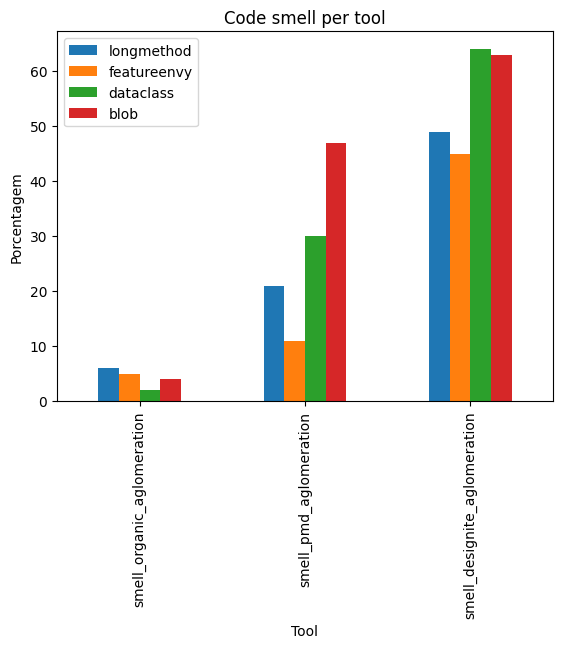

In [26]:
ax = df_agglomeration.plot(x='Aglomeration', kind='bar', stacked=False,
        title='Stacked Bar Graph by dataframe')
#ax = df_graph.plot(x='index', kind='bar', stacked=True, title='Stacked Bar Graph by dataframe')

ax.set_xlabel("Tool")
ax.set_ylabel("Porcentagem")
ax.set_title("Code smell per tool")

In [ ]:
import pandas as pd

# Criando dois DataFrames de exemplo
df1 = pd.DataFrame({
    'Coluna1': ['A', 'B', 'C'],
    'Coluna2': [1, 2, 3]
})

df2 = pd.DataFrame({
    'Coluna1': ['D', 'E', 'F'],
    'Coluna2': [4, 5, 6]
})

# Unindo os DataFrames um embaixo do outro
df_unido = pd.concat([df1, df2], ignore_index=True)

print(df_unido)


  Coluna1  Coluna2
0       A        1
1       B        2
2       C        3
3       D        4
4       E        5
5       F        6
